# Uganda OCDS data on bids

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
bids = pd.read_csv("../data/uganda_22_bids.csv")

In [3]:
# check
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19513 non-null  int64  
 1   ocid                         19513 non-null  object 
 2   date                         19513 non-null  object 
 3   tag                          19513 non-null  object 
 4   bids_details_id              7345 non-null   float64
 5   bids_details_date            7345 non-null   object 
 6   bids_details_value_amount    7345 non-null   float64
 7   bids_details_value_currency  7345 non-null   object 
 8   bids_details_status          7345 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [4]:
# lots of nulls, drop them
bids = bids.dropna()
bids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7345 entries, 0 to 19511
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   7345 non-null   int64  
 1   ocid                         7345 non-null   object 
 2   date                         7345 non-null   object 
 3   tag                          7345 non-null   object 
 4   bids_details_id              7345 non-null   float64
 5   bids_details_date            7345 non-null   object 
 6   bids_details_value_amount    7345 non-null   float64
 7   bids_details_value_currency  7345 non-null   object 
 8   bids_details_status          7345 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 573.8+ KB


In [5]:
# convert
bids.date = bids.date.astype("datetime64[ns]")
bids.ocid = bids.ocid.astype("string")
bids.tag = bids.tag.astype("string")
bids.bids_details_date = bids.bids_details_date.astype("datetime64[ns]")
bids.bids_details_value_currency = bids.bids_details_value_currency.astype("string")
bids.bids_details_status = bids.bids_details_status.astype("string")

In [6]:
#RQ1 = are all bid currencies the same?
pd.unique(bids.bids_details_value_currency)

<StringArray>
['UGX', 'USD', 'EUR', 'GBP', 'KES']
Length: 5, dtype: string

In [7]:
bids.bids_details_value_currency.value_counts()

UGX    7096
USD     224
EUR      12
KES       8
GBP       5
Name: bids_details_value_currency, dtype: Int64

In [8]:
#TODO lookup/convert to UGX

#for now we'll ignore those ones
bids_ugx = bids[bids.bids_details_value_currency == 'UGX']

In [9]:
bids_ugx.describe()

,Unnamed: 0,bids_details_id,bids_details_value_amount
count,7096.000000,7096.000000,7.096000e+03
mean,9898.785372,233608.651917,4.617282e+08
std,5682.936165,8931.745378,1.376081e+10
min,1.000000,217682.000000,0.000000e+00
25%,4972.500000,225015.750000,1.300376e+06
50%,9895.500000,234620.000000,3.078148e+06
75%,14856.500000,241884.250000,4.888720e+06
max,19512.000000,253375.000000,7.401689e+11


In [10]:
pd.unique(bids.bids_details_status)
## all the same so can't tell us anything

<StringArray>
['valid']
Length: 1, dtype: string

In [11]:
pd.unique(bids.tag)
# all the same, should probably filter out at R time

<StringArray>
['compiled']
Length: 1, dtype: string

In [12]:
bids = bids.drop(["tag", "bids_details_status"], axis=1)

In [26]:
#subset again for < 1
subset_bids = bids[bids.bids_details_date.dt.year > 2004]
subset_bids = subset_bids[subset_bids.bids_details_value_amount < 2.0e+9]

In [ ]:
plot_value_by_year(subset_bids)
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_20765/3330274121.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_value_by_year(bids_not_in_subset[bids.bids_details_date.dt.year > 2004])


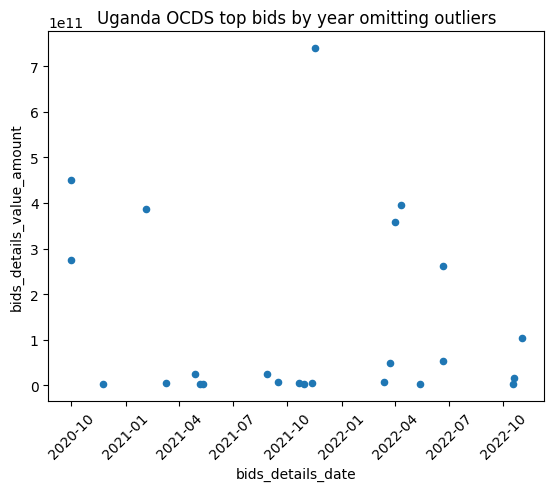

In [28]:
# what have we omitted?
# Get the index of the rows in df that are not in subset
not_in_subset = bids.index.difference(subset_bids.index)

# Get the DataFrame of the rows that are not in subset
bids_not_in_subset = bids.loc[not_in_subset]
plot_value_by_year(bids_not_in_subset[bids.bids_details_date.dt.year > 2004])
plt.xticks(rotation=45)
plt.title("Uganda OCDS top bids by year omitting outliers")
# save
plt.savefig("../output/uganda_bids_ugx_incl_top.png")
plt.show()

In [29]:
# top bids
bids.sort_values('bids_details_value_amount', ascending=False).head(30) 

,Unnamed: 0,ocid,date,bids_details_id,bids_details_date,bids_details_value_amount,bids_details_value_currency
15516,15517,ocds-rdvc92-871656309608,2022-06-27 06:00:08,234781.0,2021-11-16,7.401689e+11,UGX
10316,10317,ocds-rdvc92-661656313351,2022-06-27 07:02:31,234547.0,2020-09-30,4.508214e+11,UGX
7342,7343,ocds-rdvc92-231656396962,2022-06-28 06:16:02,234769.0,2022-04-11,3.947649e+11,UGX
13017,13018,ocds-rdvc92-741656321355,2022-06-27 09:15:55,234588.0,2021-02-04,3.858594e+11,UGX
11010,11011,ocds-rdvc92-511648802411,2022-04-01 08:40:11,234774.0,2022-04-01,3.573695e+11,UGX
4030,4031,ocds-rdvc92-961656314710,2022-06-27 07:25:10,234548.0,2020-09-30,2.754640e+11,UGX
7515,7516,ocds-rdvc92-541655804108,2022-06-21 09:35:08,233615.0,2022-06-21,2.610894e+11,UGX
18626,18627,ocds-rdvc92-831668756304,2022-11-18 07:25:04,244906.0,2022-11-01,1.030062e+11,UGX
3787,3788,ocds-rdvc92-341655799678,2022-06-21 08:21:18,233584.0,2022-06-21,5.290850e+10,UGX
10810,10811,ocds-rdvc92-671656308374,2022-06-27 05:39:34,234540.0,2022-03-23,4.861788e+10,UGX


In [18]:
def plot_value_by_year(dataframe):
    dataframe.plot(x="bids_details_date", y="bids_details_value_amount", kind="scatter")